In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the data
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking the data shape
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#checking data type
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#checking columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
#checking missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#checking stats of data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1.As we can see min value of citric acid is showing 0.000000, may be it's not possible,
2.the difference between quantile2 and quantile3 is very low in residual sugar where as difference of max of residual sugar with its quantile 3 is very high, so there is skewness in the data,
3.In free sulfur dioxide column we can see the difference of max and quantile3 is very high, so presence of skewness is possible.

In [10]:
# checking the skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [11]:
# Checking the Lable column to understand the dataset is balanced or not.
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

As we can see there are 6 different qualities of Wine are present in the target column. Where, each category is not balanced, Category 5 is having 681 wine samples, category 6 is having 638 wine samples, category 7 is having 199 wine samples, category 4 is having 53 wine samples, category 8 is having 18 wine samples and category 3 is having 10 wine samples

<AxesSubplot:xlabel='quality', ylabel='count'>

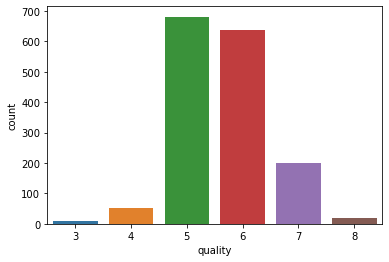

In [12]:
# visualize wine categories

sns.countplot(df['quality'])

we can see 6 different categories are having 6 different numbers of wine samples, by this visualization 

Text(0.5, 1.0, 'alcohol content')

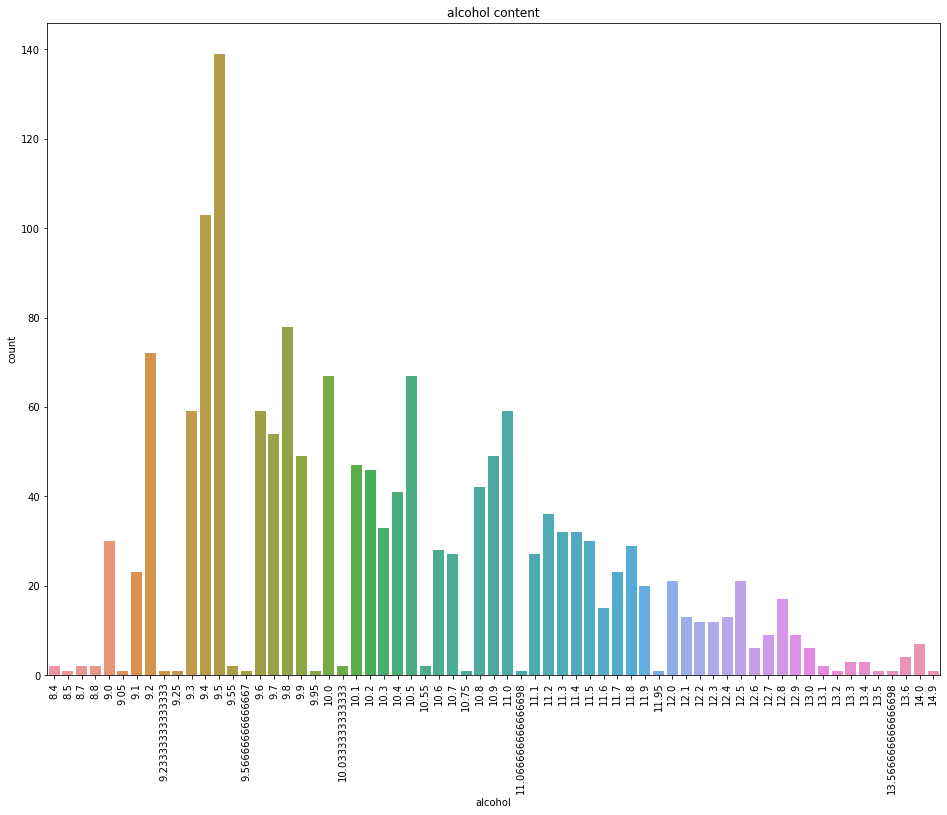

In [13]:
plt.figure(figsize=(16,12))
sns.countplot(df['alcohol'])
plt.xticks(rotation=90)
plt.title("alcohol content")

In [14]:
#checking the Distribution of the feature data.

data_features=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
target=df['quality']

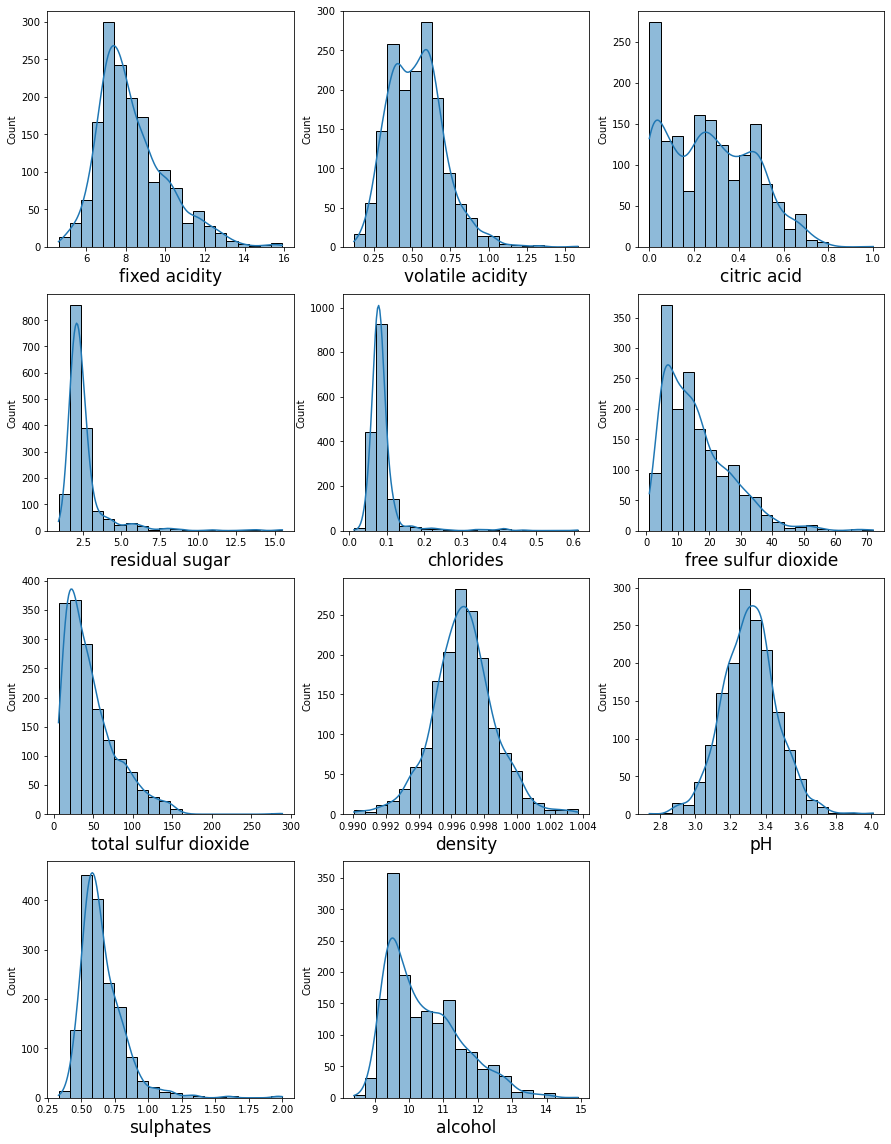

In [15]:
plt.figure(figsize=(15,20),facecolor='white')
plotnum=1
for column in data_features:
    if plotnum<=12:
        ax=plt.subplot(4,3,plotnum)
        sns.histplot(data_features[column],kde=True,bins=20)
        plt.xlabel(column,fontsize=17)
        plotnum+=1
        
plt.show()

there are more or less skewness in every Independent variables. Fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates' and 'alcohol' columns are having right skewness. So, after all the analysis we will try to reduce the skewness.

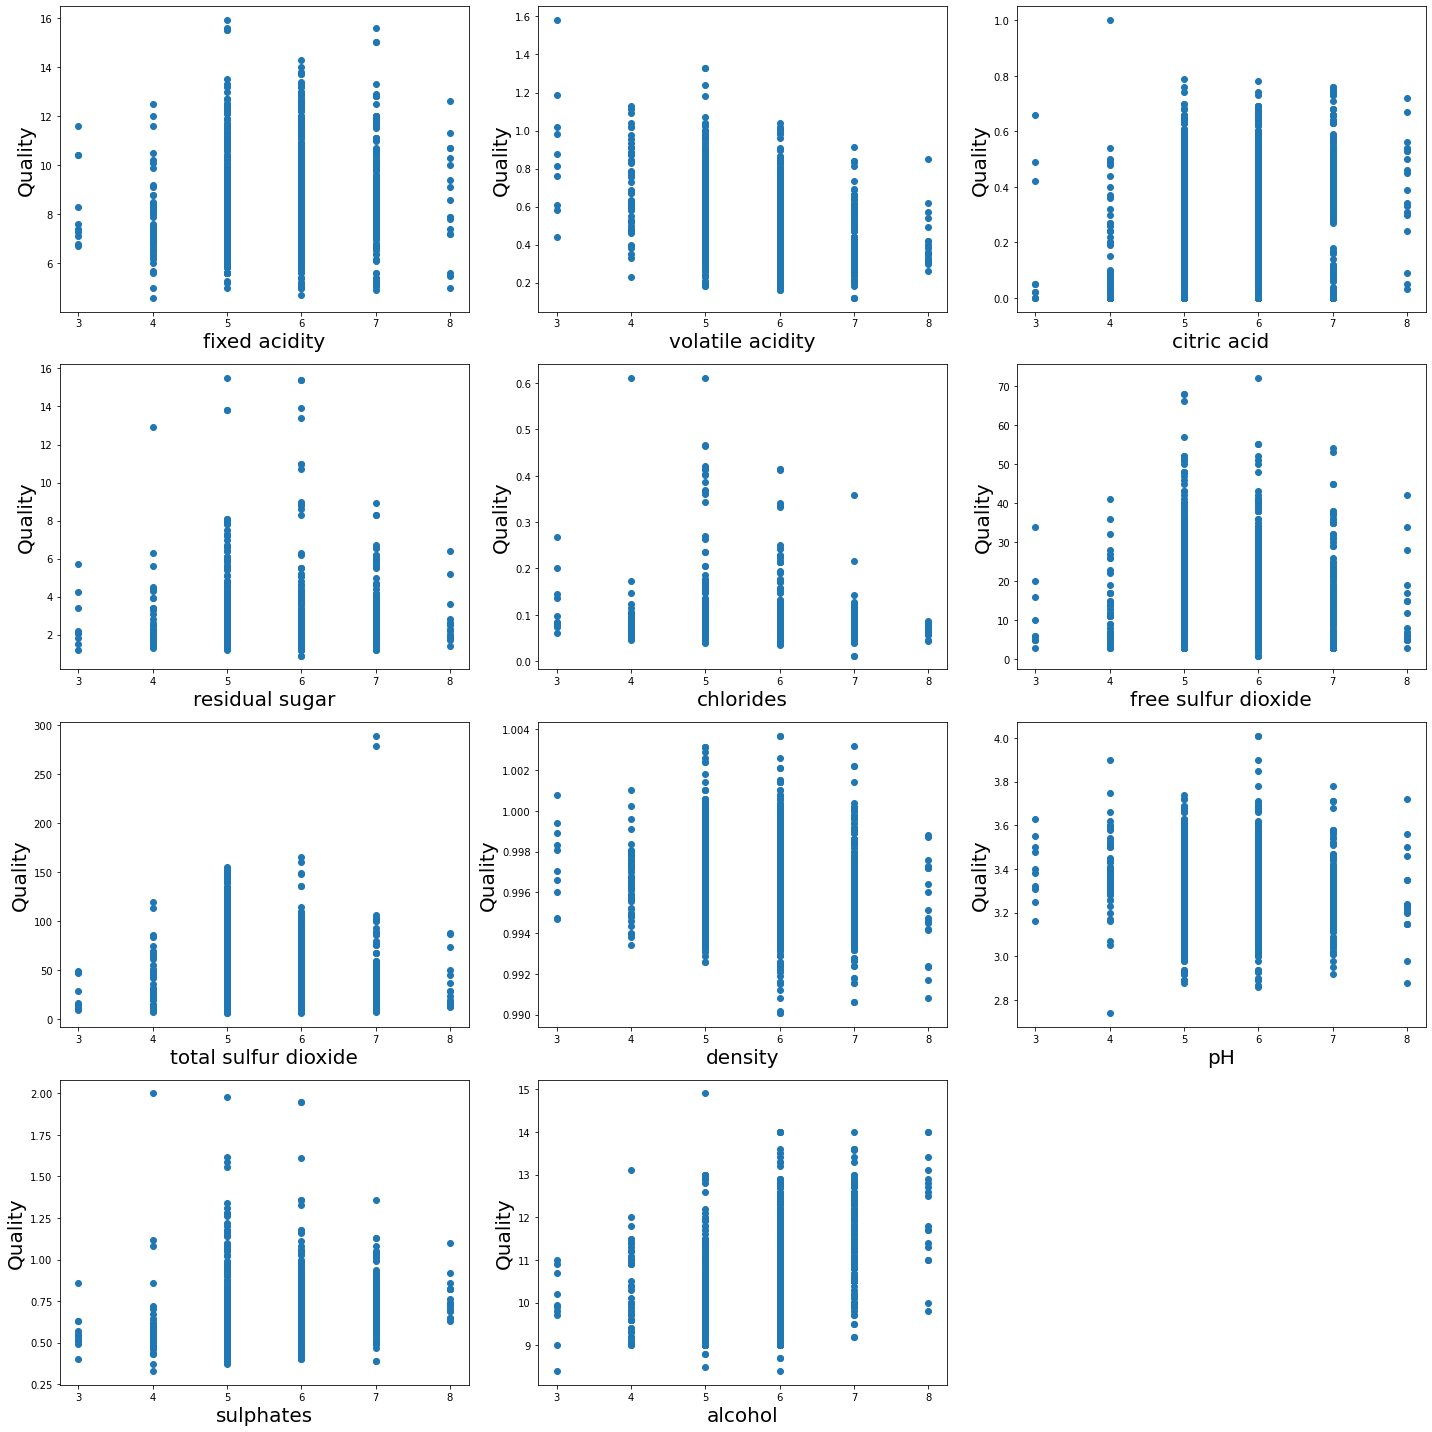

In [16]:
#check the relations between independent variables with target
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=12:
        ax= plt.subplot(4,3,plotnumber)
        plt.scatter(target,data_features[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Quality',fontsize=20)
    plotnumber +=1    
plt.tight_layout()

#1. Better quality wine is having less fixed acidity
#2.Better quality wine is having less volatile acidity,
#3.better quality wine is containing more citric acid,
#4.Better quality wine contains less residual sugar,
#5.Better quality wine is containing less chlorides,
#6.better quality wine is having less free sulfur dioxide,
#7.better quality wine is having less total sulfur dioxide but there is outliers also,
#8.better qulity wine is having less density,
#9better the quality of wine lesser the pH,
#10.better the wine quality lesser the sulphates,
#11.better the wine quality more the alcohol content. But we need to check these relations more to conclude anything.

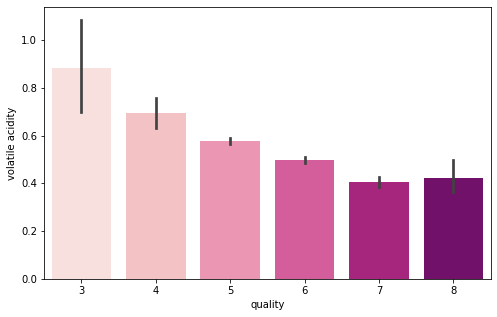

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(df['quality'],df['volatile acidity'],palette="RdPu")
plt.show()

wine quality decreases with increasing volatile acidity

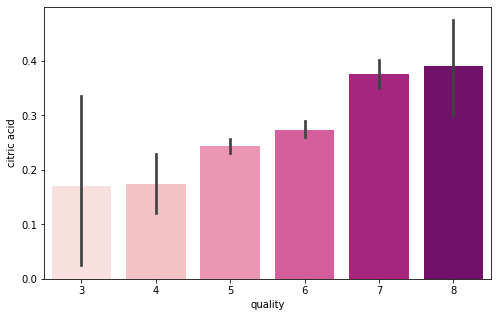

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(df['quality'],df['citric acid'],palette="RdPu")
plt.show()

More citric acid better quality wine

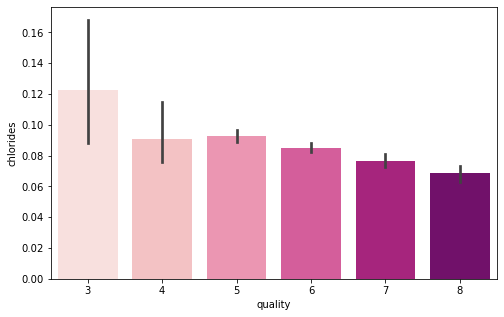

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(df['quality'],df['chlorides'],palette="RdPu")
plt.show()

wine quality decreases with increasing chlorides in wine

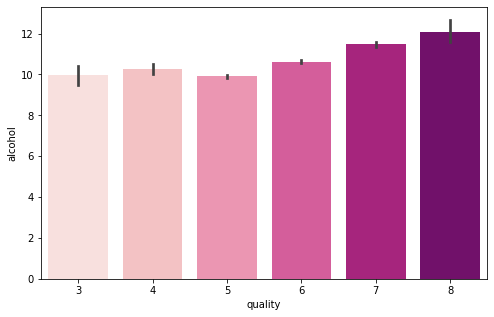

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(df['quality'],df['alcohol'],palette="RdPu")
plt.show()

wine quality increases by increasing alcohol content.

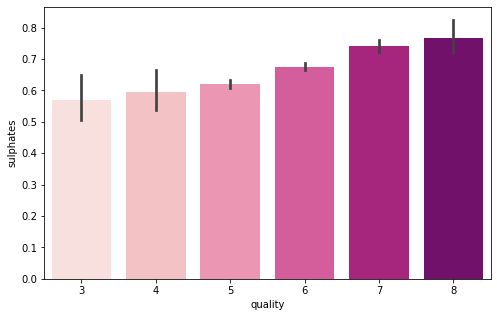

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(df['quality'],df['sulphates'],palette="RdPu")
plt.show()

the more sulphates more better quality wine.

dividing the 'quality' 7 or higher classified as 'good/1' and the remainder as 'Bad/0

In [22]:
bins=(2, 6.5, 8)
group_names=['bad', 'good']
df['quality']=pd.cut(df['quality'], bins=bins, labels =group_names)

In [40]:
#importing  Preprocessing lib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
#assign labels to our target variable:
wine_quality = LabelEncoder()

In [25]:
#Bad is 0 and good is 1 :
df['quality'] = wine_quality.fit_transform(df['quality'])

In [26]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

We have divided the the target variable into only two categories

<AxesSubplot:xlabel='quality', ylabel='count'>

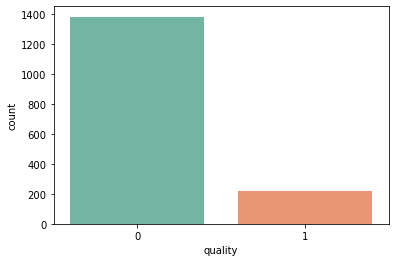

In [27]:
# ploting the target 
sns.countplot(df['quality'],palette='Set2')

 the target is imbalanced as 'Bad'(0) category is having more data(1382) and 'Good'(1) is having less data. So, we will balance the target before training the model

## We are using boxplot to detect the outliers in the dataset

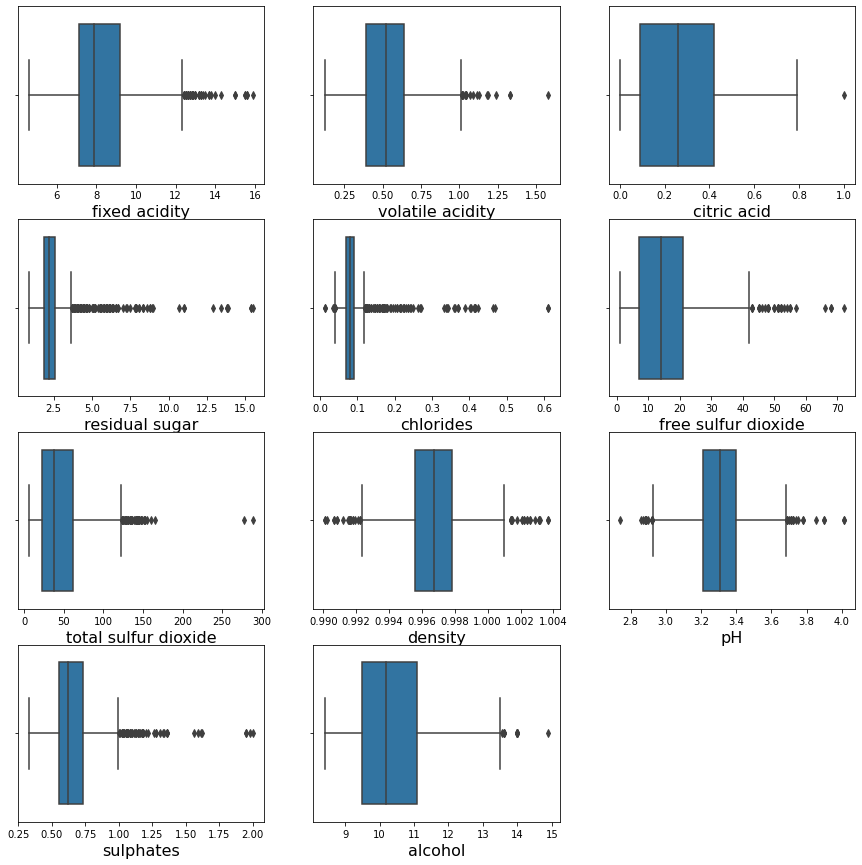

In [28]:
plt.figure(figsize=(15,15),facecolor='white')
pltnum = 1
for column in data_features:
    if pltnum<=11:
        ax=plt.subplot(4,3,pltnum)
        sns.boxplot(data_features[column])
        plt.xlabel(column,fontsize=16)
    pltnum+=1
plt.show();

we can see more or less each and every feature is having outliers. Some features are having outliers in both ends. Some are having in higher side and some features are having in lower side. but no feature is without outlier.

##Plotting heatmap (correlation matrix)

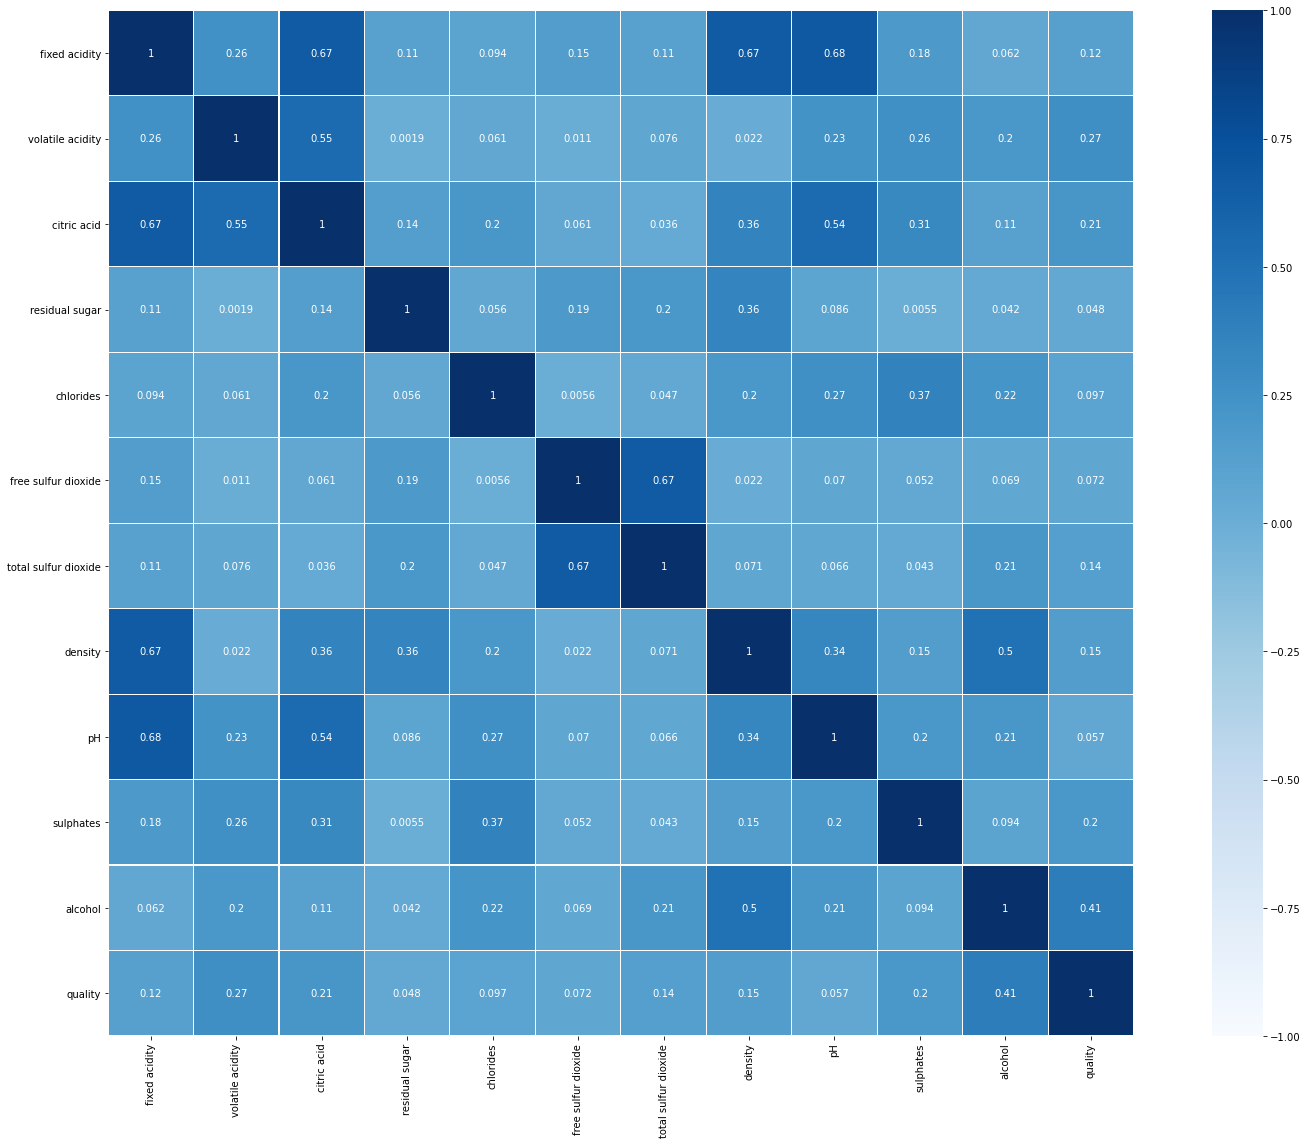

In [29]:
data_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(data_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,cmap='Blues',
            linewidths=.1)
plt.tight_layout()

this dataset, Free sulfur dioxide and total sulfer dioxide has correlation(0.67), pH with citric acid has correlation(0.54),fixed acidity and citric acid has correlation(0.67),volatile acidity and citric acid has correlation(0.55). On the other hand Alcohol has a good relation with quality.

In [30]:
# removing outliers using Z-Score

from scipy.stats import zscore

In [31]:
z_score = zscore(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]) #converting data into standard normal distribution
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

In [32]:
df=df[filtering_entry]
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,0.137860
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.344871
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,0.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,0.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,1.000000


In [33]:
#checking data , how much data we have lost after eliminate outliers

df.shape

(1458, 12)

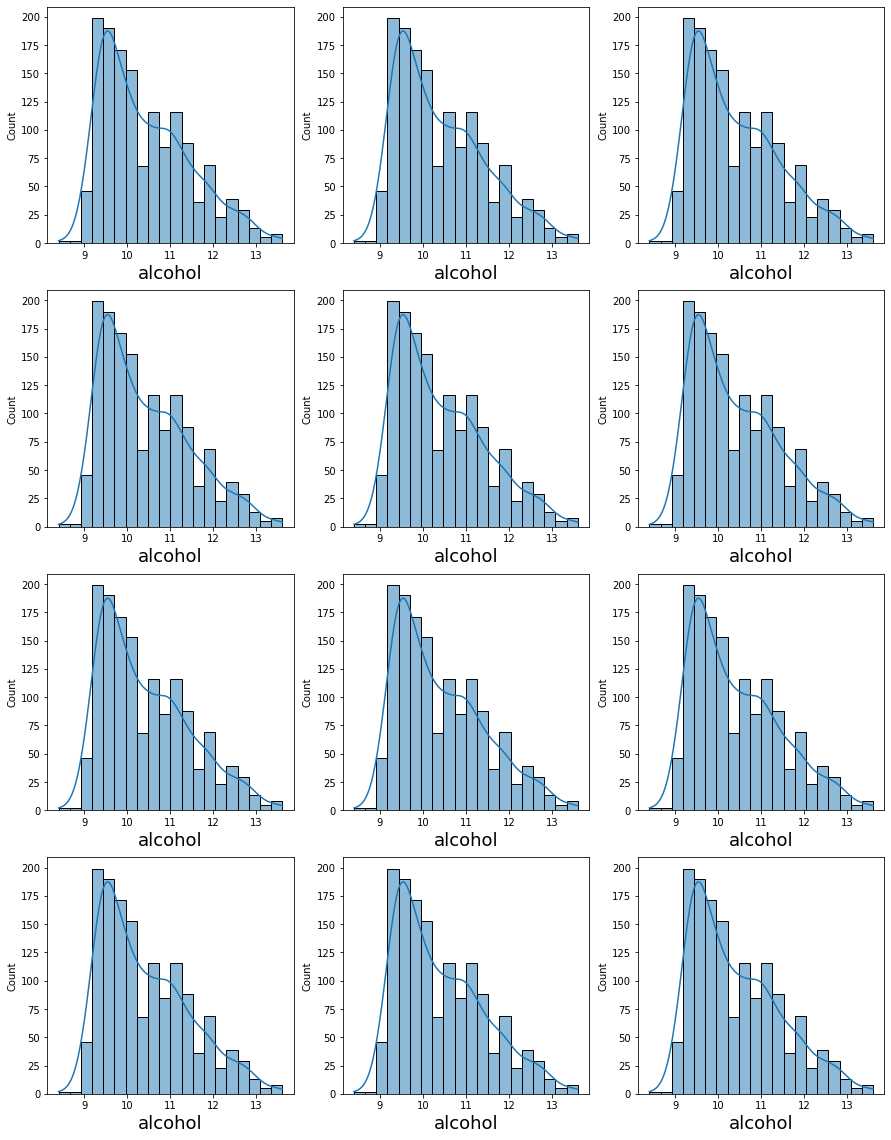

In [34]:
# checking skewness is gone or not

plt.figure(figsize=(15,20),facecolor='white')
plotnum=1
for coulmn in df:
    if plotnum<=12:
        ax=plt.subplot(4,3,plotnum)
        sns.histplot(df[column],kde=True,bins=20)
        plt.xlabel(column,fontsize=18)
    plotnum+=1
    
plt.show();

we can see some features are normally distributed after eleminating the skewness but some of them are still having them. But we can't loose more data to make these features normally distributed.

In [35]:
# dividing the data into feature and target
x=df.drop(columns=['quality'])
y=df['quality']

In [36]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [43]:
y.value_counts()

0    1257
1     201
Name: quality, dtype: int64

balance the target variable. Let's do it using SMOTE. And we are going to upscale the good quality category as it is very less.

In [46]:
# installing imblearn 
!pip install imblearn

In [47]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [48]:
y.value_counts()

0    1257
1    1257
Name: quality, dtype: int64

now the data are balanced 


time to standarize the features 

In [49]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
2509,9.383978,0.380000,0.423714,2.317719,0.103274,6.000000,10.000000,0.996205,3.127257,0.599199,11.872573
2510,9.533616,0.453679,0.370162,2.254405,0.067840,4.136012,16.000000,0.996768,3.266638,0.766638,10.784003
2511,8.709291,0.352790,0.413953,4.676745,0.064069,3.000000,9.232546,0.997150,3.354420,0.655349,11.739527
2512,10.337444,0.411850,0.700286,5.822784,0.075408,38.625562,75.687219,0.998298,3.140286,0.815594,11.968722


In [54]:
# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

i am going to build 5 different models. Those are,

Decision Tree Classifier

Random Forest Classifier

K-Neighbors Classifier

Support Vector Classifier

Gradient Boosting Classifier

#1. Decision Tree Classifier 

In [56]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    953.0  932.0       1.0     1885.0        1885.0
________________________________________________________________
 Confusion Matrix:
[[953   0]
 [  0 932]]



In [57]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n") 


=======================Test Result of dt_clf===========================
Accuracy score:88.24%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.883333    0.881459  0.882353    0.882396      0.882365
recall       0.871711    0.892308  0.882353    0.882009      0.882353
f1-score     0.877483    0.886850  0.882353    0.882167      0.882323
support    304.000000  325.000000  0.882353  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[265  39]
 [ 35 290]]



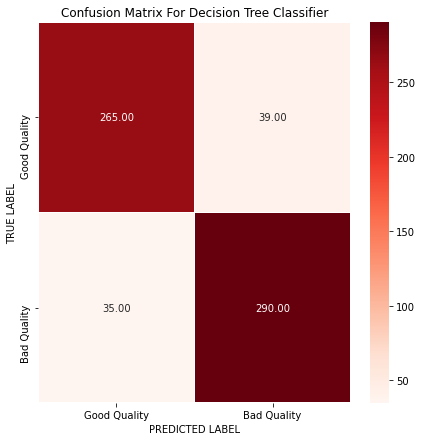

In [58]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [59]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.8820091093117408

#2. Random Forest Classifier :

In [60]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    953.0  932.0       1.0     1885.0        1885.0
________________________________________________________________
 Confusion Matrix:
[[953   0]
 [  0 932]]



In [61]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")


=======================Test Result of RF_clf===========================
Accuracy score:94.28%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.971831    0.918841  0.942766    0.945336      0.944451
recall       0.907895    0.975385  0.942766    0.941640      0.942766
f1-score     0.938776    0.946269  0.942766    0.942522      0.942647
support    304.000000  325.000000  0.942766  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[276  28]
 [  8 317]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

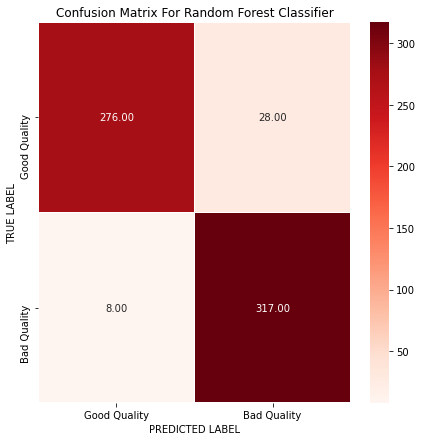

In [62]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [63]:
#ROC_AOC Score of Random Forest Classifier:
roc_auc_score(y_test,rf.predict(x_test))

0.9416396761133603

#3. K-Neighbors Classifier

In [64]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:92.15%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.989064    0.869115  0.921485     0.929090      0.929758
recall       0.854145    0.990343  0.921485     0.922244      0.921485
f1-score     0.916667    0.925777  0.921485     0.921222      0.921171
support    953.000000  932.000000  0.921485  1885.000000   1885.000000
________________________________________________________________
 Confusion Matrix:
[[814 139]
 [  9 923]]



In [65]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:88.39%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.991489    0.819797  0.883943    0.905643      0.902777
recall       0.766447    0.993846  0.883943    0.880147      0.883943
f1-score     0.864564    0.898470  0.883943    0.881517      0.882083
support    304.000000  325.000000  0.883943  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[233  71]
 [  2 323]]



Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

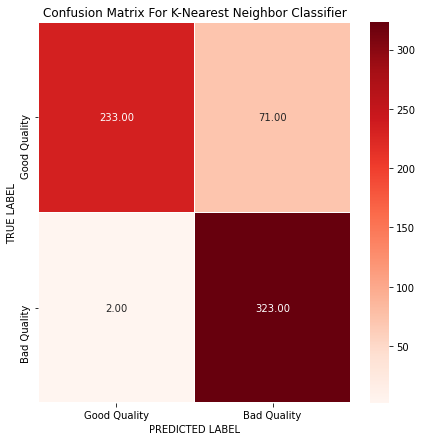

In [66]:

cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [67]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:
roc_auc_score(y_test,kn.predict(x_test))

0.8801467611336034

#4. Support Vector Classifier

In [68]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")


=======================Train Result===========================
Accuracy score:91.30%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.924650    0.901674  0.912997     0.913162      0.913290
recall       0.901364    0.924893  0.912997     0.913128      0.912997
f1-score     0.912859    0.913136  0.912997     0.912997      0.912996
support    953.000000  932.000000  0.912997  1885.000000   1885.000000
________________________________________________________________
 Confusion Matrix:
[[859  94]
 [ 70 862]]



In [69]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print("\n=======================Test Result of SVC===========================")
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n") 


=======================Test Result of SVC===========================
Accuracy score:89.51%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.921986    0.873199  0.895072    0.897592      0.896778
recall       0.855263    0.932308  0.895072    0.893785      0.895072
f1-score     0.887372    0.901786  0.895072    0.894579      0.894819
support    304.000000  325.000000  0.895072  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[260  44]
 [ 22 303]]



Text(0.5, 1.0, 'Confusion Matrix Of SVC')

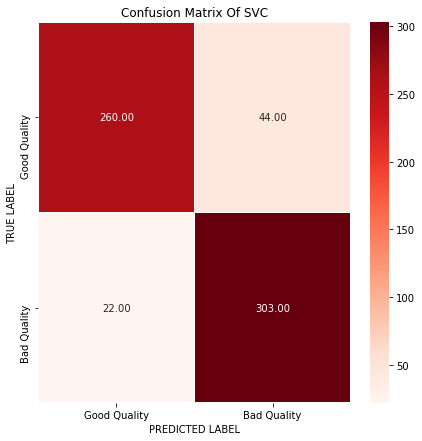

In [70]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of SVC')

In [71]:
#ROC_AUC Score of SVC:
roc_auc_score(y_test,svc.predict(x_test))

0.8937854251012146

#5. Gradient Boosting Classifier

In [72]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:94.38%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.966924    0.922290  0.943767     0.944607      0.944856
recall       0.920252    0.967811  0.943767     0.944031      0.943767
f1-score     0.943011    0.944503  0.943767     0.943757      0.943748
support    953.000000  932.000000  0.943767  1885.000000   1885.000000
________________________________________________________________
 Confusion Matrix:
[[877  76]
 [ 30 902]]



In [73]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result of GB_Clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")


=======================Test Result of GB_Clf===========================
Accuracy score:90.14%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.932143    0.876791  0.901431    0.904467      0.903543
recall       0.858553    0.941538  0.901431    0.900046      0.901431
f1-score     0.893836    0.908012  0.901431    0.900924      0.901160
support    304.000000  325.000000  0.901431  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[261  43]
 [ 19 306]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

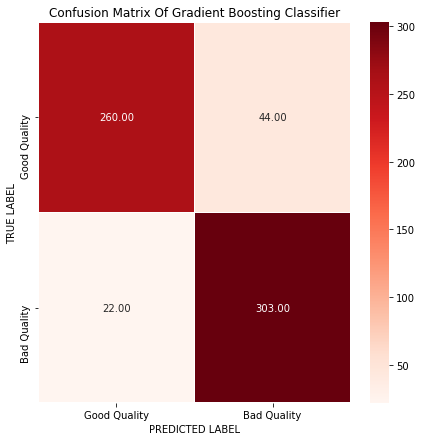

In [74]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [75]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,svc.predict(x_test))

0.8937854251012146

The accuracy score of 5 different models 

Decision Tree Classifier:88.71%
    
Random Forest Classifier:93.16%
    
K-Neighbors Classifier: 88.39% 
    
Support Vector Classifier: 88.39%
    
Gradient Boosting Classifier: 88.87%

    
the Random Forest Classifier is giving the best accuracy

 ploting the ROC_AUC Curve

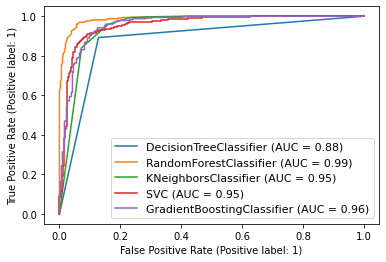

In [76]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

As we can see Random forest is giving the best result(the orange line)

Cross validation 

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [77]:
#CV score of Decision Tree Classifier
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:87.59%


In [78]:
#CV score of Random forest
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:91.01%


In [79]:
#CV Score of KNN
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:85.56%


In [80]:
#CV Score of SVC
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:73.83%


In [81]:
#CV Score of SVC:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:87.91%


Hyperparameter Tuning of Random Forest Classifier

In [91]:
rf = RandomForestClassifier()
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)

print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}
con_mat=>  
 [[260  44]
 [ 13 312]]
Accuracy of rf After Hyperparameter Tuning==>  90.93799682034977


In [85]:
# classification report
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       304
           1       0.90      0.95      0.92       325

    accuracy                           0.92       629
   macro avg       0.92      0.92      0.92       629
weighted avg       0.92      0.92      0.92       629



In [95]:
#saving model
#import joblib
import joblib

joblib.dump(rf,'redWine_file.obj')

['redWine_file.obj']